@author = Ali Masoumnia

amasoumnia@outlook.com

# H&T Fortune Challenge

## Introduction

A minimum spanning tree is an acylical subset of an undirected graph where the sum of all weights is kept at a full minimum, while the tree still spans the graph. In this implementation, an undirected weighted graph is represented by an adjacency matrix and is both input and output of the mst function. Pandas dataframes are used for these matrices to facilitate the string indicies of tickers as nodes. The pseudocode for this function is presented in: https://arxiv.org/abs/1703.00485.

## Minimum Spanning Tree

### Kruskal Implementation
#### Data Handling

In [119]:
import numpy as np
import pandas as pd

#function written for pandas adjacency matrices
from kruskal import mst
from tests import check_mst

In [120]:
df = pd.read_csv("amex_rand50.csv", parse_dates=True, index_col='date')

#### Computing log Returns of the Assets

In [121]:
log_ret = np.log(df).diff().dropna()
log_ret

,DF,SQBG,C,PPC,VOD,TRUP,NATI,GNUS,RINF,DMLP,...,GER,DVYE,GAM,AY,LAC,NKSH,EME,BBDO,GRIF,IMGN
date,,,,,,,,,,,,,,,,,,,,,
2015-05-01,0.003685,-0.010539,0.008218,0.029519,-0.007700,0.043571,-0.008427,-0.060432,0.007277,0.001747,...,0.009744,0.002631,0.009321,-0.011269,-0.049597,-0.003453,0.015783,0.000000,0.000000,0.014406
2015-05-04,-0.004301,-0.013126,0.007598,0.001963,0.002859,0.021726,0.005976,-0.013201,-0.008866,-0.005249,...,-0.006485,0.010239,0.003088,0.015389,0.016807,0.002073,0.003742,-0.022990,0.027718,0.003569
2015-05-05,-0.009901,-0.008292,-0.015253,-0.012633,-0.008025,0.008811,0.006986,0.039093,0.001589,0.008734,...,0.008422,0.004541,-0.010424,0.002054,0.016529,-0.019168,0.002195,-0.021548,0.000000,-0.035049
2015-05-06,-0.006238,0.009117,-0.009984,-0.028614,0.014853,0.007491,-0.011201,-0.039093,0.000000,0.008227,...,-0.011681,-0.005625,-0.005965,-0.017145,0.048009,-0.005646,0.006556,-0.004963,0.000000,-0.011132
2015-05-07,-0.003762,0.032470,0.009234,-0.005329,-0.001419,0.000000,-0.000704,-0.037229,0.000000,-0.010839,...,-0.004580,-0.006967,0.003697,0.018609,-0.015748,-0.002480,-0.007433,0.016774,0.000311,0.024571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-12,0.000000,-0.094491,0.022651,0.019123,0.014278,-0.009586,0.019032,0.041243,0.005751,0.020308,...,0.015748,0.005371,0.000878,0.003982,0.010953,-0.007737,0.006942,-0.015326,0.016584,-0.014815
2019-04-15,0.072103,0.017858,-0.000593,0.019609,0.014615,0.005368,-0.007015,0.005038,-0.000358,-0.007762,...,-0.017514,0.002918,0.005252,0.001985,-0.017583,0.000970,0.002086,0.001286,0.007918,0.022141
2019-04-16,-0.090972,0.008811,0.028241,0.029530,-0.001075,-0.022511,0.006803,0.000000,-0.000717,0.002076,...,-0.012445,0.001940,0.003486,-0.001985,-0.054683,-0.014656,0.000391,0.003849,-0.007096,-0.011009


#### Computing the Correlation Matrix

In [122]:
corr = log_ret.corr() #correlation matrix (dataframe) of log returns
corr

,DF,SQBG,C,PPC,VOD,TRUP,NATI,GNUS,RINF,DMLP,...,GER,DVYE,GAM,AY,LAC,NKSH,EME,BBDO,GRIF,IMGN
DF,1.000000,0.134295,0.117884,0.185416,0.134690,0.072274,0.079081,0.059838,0.030613,0.082329,...,0.110893,0.095780,0.162096,0.059253,0.013526,0.123530,0.116517,0.069471,0.022214,0.045443
SQBG,0.134295,1.000000,0.188575,0.073260,0.085516,0.144972,0.159547,0.086579,0.105411,0.130219,...,0.160279,0.177127,0.184769,0.115473,0.056405,0.167408,0.230055,0.113140,0.154118,0.028745
C,0.117884,0.188575,1.000000,0.195809,0.401970,0.250866,0.358793,0.089070,0.207429,0.189276,...,0.423860,0.539164,0.594398,0.246211,0.189167,0.330709,0.481906,0.182026,0.143624,0.223703
PPC,0.185416,0.073260,0.195809,1.000000,0.217682,0.100858,0.160136,0.047757,0.096466,0.102827,...,0.149429,0.247542,0.236449,0.136715,0.032140,0.132911,0.249026,0.132804,0.060087,0.037325
VOD,0.134690,0.085516,0.401970,0.217682,1.000000,0.054646,0.224806,0.109669,0.091964,0.123914,...,0.301992,0.460423,0.400955,0.183211,0.101225,0.148344,0.255465,0.144951,0.048907,0.155452
TRUP,0.072274,0.144972,0.250866,0.100858,0.054646,1.000000,0.213302,-0.004193,0.068103,0.087518,...,0.138302,0.204934,0.239660,0.145081,0.097276,0.217666,0.243584,0.068564,0.076308,0.089468
NATI,0.079081,0.159547,0.358793,0.160136,0.224806,0.213302,1.000000,0.025573,0.075845,0.141107,...,0.233829,0.363862,0.396882,0.168621,0.126861,0.230386,0.403664,0.162042,0.073413,0.161721
GNUS,0.059838,0.086579,0.089070,0.047757,0.109669,-0.004193,0.025573,1.000000,0.033590,0.047493,...,0.149547,0.080735,0.053558,0.063280,0.077096,0.073506,0.056087,-0.019714,0.083590,0.042534
RINF,0.030613,0.105411,0.207429,0.096466,0.091964,0.068103,0.075845,0.033590,1.000000,0.115095,...,0.209557,0.163020,0.120953,0.139755,0.110883,0.091549,0.152449,0.057738,0.020015,0.066018
DMLP,0.082329,0.130219,0.189276,0.102827,0.123914,0.087518,0.141107,0.047493,0.115095,1.000000,...,0.384791,0.304740,0.212286,0.132744,0.101404,0.118872,0.201675,0.148910,-0.009387,0.080556


#### Computing the Distance Matrix

Computed outside of Kruskal function since algorithm should be universal to all undirected weighted graphs

In [123]:
dist = np.sqrt( 2*(1 - corr) ) #distance dataframe 
dist

,DF,SQBG,C,PPC,VOD,TRUP,NATI,GNUS,RINF,DMLP,...,GER,DVYE,GAM,AY,LAC,NKSH,EME,BBDO,GRIF,IMGN
DF,0.000000,1.315831,1.328244,1.276388,1.315531,1.362149,1.357144,1.371249,1.392399,1.354748,...,1.333497,1.344783,1.294530,1.371675,1.404617,1.323986,1.329272,1.364206,1.398417,1.381707
SQBG,1.315831,0.000000,1.273912,1.361426,1.352393,1.307691,1.296498,1.351607,1.337602,1.318924,...,1.295933,1.282867,1.276895,1.330058,1.373751,1.290420,1.240923,1.331810,1.300679,1.393739
C,1.328244,1.273912,0.000000,1.268220,1.093645,1.224037,1.132437,1.349763,1.259024,1.273361,...,1.073443,0.960038,0.900669,1.227835,1.273446,1.156971,1.017933,1.279042,1.308721,1.246031
PPC,1.276388,1.361426,1.268220,0.000000,1.250854,1.341001,1.296043,1.380031,1.344272,1.339532,...,1.304278,1.226750,1.235760,1.313990,1.391301,1.316882,1.225540,1.316963,1.371067,1.387570
VOD,1.315531,1.352393,1.093645,1.250854,0.000000,1.375030,1.245146,1.334415,1.347617,1.323696,...,1.181531,1.038823,1.094573,1.278115,1.340728,1.305110,1.220275,1.307707,1.379197,1.299652
TRUP,1.362149,1.307691,1.224037,1.341001,1.375030,0.000000,1.254351,1.417175,1.365208,1.350913,...,1.312782,1.261004,1.233158,1.307607,1.343669,1.250867,1.229973,1.364871,1.359185,1.349468
NATI,1.357144,1.296498,1.132437,1.296043,1.245146,1.254351,0.000000,1.396013,1.359526,1.310643,...,1.237878,1.127952,1.098288,1.289480,1.321468,1.240656,1.092095,1.294572,1.361314,1.294820
GNUS,1.371249,1.351607,1.349763,1.380031,1.334415,1.417175,1.396013,0.000000,1.390259,1.380223,...,1.304188,1.355924,1.375821,1.368737,1.358605,1.361245,1.373982,1.428086,1.353817,1.383810
RINF,1.392399,1.337602,1.259024,1.344272,1.347617,1.365208,1.359526,1.390259,0.000000,1.330342,...,1.257333,1.293816,1.325931,1.311674,1.333504,1.347925,1.301961,1.372779,1.399989,1.366735
DMLP,1.354748,1.318924,1.273361,1.339532,1.323696,1.350913,1.310643,1.380223,1.330342,0.000000,...,1.109242,1.179203,1.255160,1.317009,1.340594,1.327500,1.263586,1.304677,1.420836,1.356056


#### Taking the Minimum Spanning Tree of Asset Distance
Kruskal's Algorithm was used with a DFS component for connection checking.

In [124]:
mst_50 = mst(dist)
mst_50

,DF,SQBG,C,PPC,VOD,TRUP,NATI,GNUS,RINF,DMLP,...,GER,DVYE,GAM,AY,LAC,NKSH,EME,BBDO,GRIF,IMGN
DF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
SQBG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.240923,0.00000,0.000000,0.000000
C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
PPC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
VOD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
TRUP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
NATI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
GNUS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.304188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
RINF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.257333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
DMLP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


### NX for Visualization

#### Original Distance Graph

In [11]:
import networkx as nx

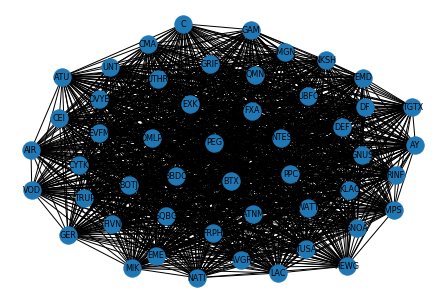

In [112]:
labels = {v: k for v, k in enumerate( dist.index.tolist() )}

#visualizing our original distance graph
d_graph = nx.from_numpy_array(np.array(dist))
d_pos = nx.spring_layout(d_graph)
nx.draw(d_graph, d_pos)
_ = nx.draw_networkx_labels(d_graph, d_pos, labels, font_size=8)

#### Visualizing NX's Kruskal

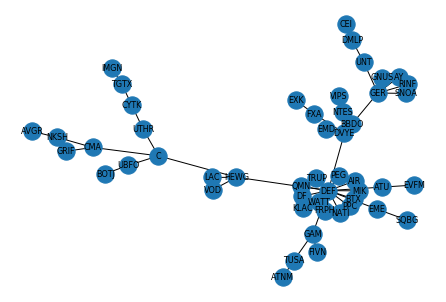

In [117]:
#using nx to compute MST
d_mst = nx.minimum_spanning_tree(d_graph)
mst_pos = nx.spring_layout(d_mst)
nx.draw(d_mst, mst_pos)
_ = nx.draw_networkx_labels(d_mst, mst_pos, labels, font_size=8)


#### Visualizing my MST

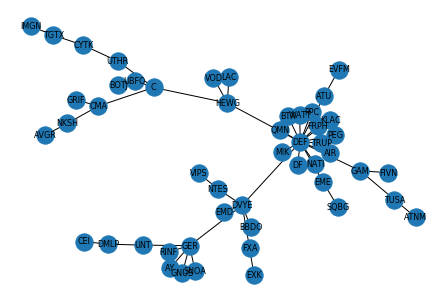

In [126]:
my_mst = nx.from_numpy_array(np.array(mst_50)) 
my_pos = nx.spring_layout(my_mst)
nx.draw(my_mst, my_pos)
_ = nx.draw_networkx_labels(my_mst, my_pos, labels, font_size=8)

We can visually ascertain that our MST's are isomorhpic, we will go ahead and check this numerically.

In [29]:
check_mst(dist, mst_50)

True

## Visualizing the Hierarchical Nature of Asset Distance

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Grind\Anaconda3\envs\ht\lib\site-packages\seaborn\matrix.py:595: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


<Figure size 504x504 with 0 Axes>

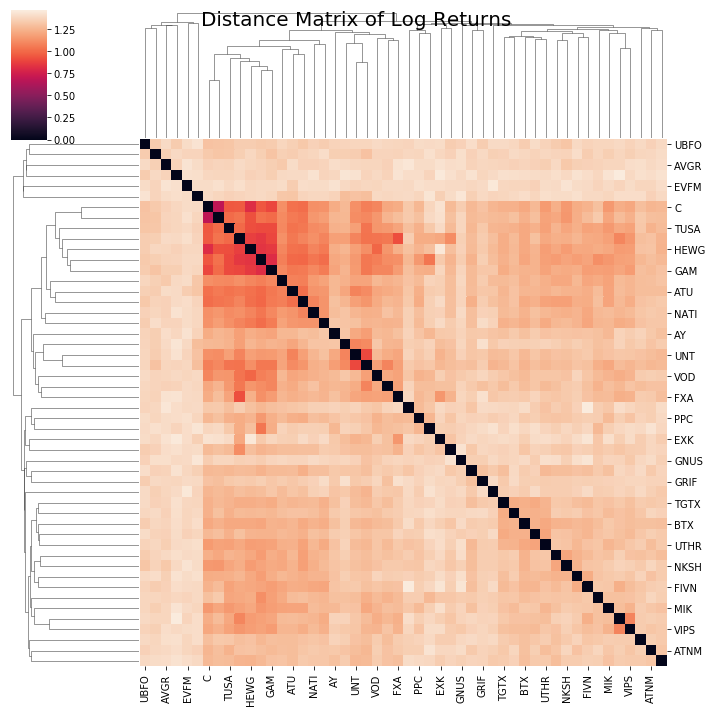

In [34]:
plt.figure(figsize=(7, 7))
dist_map = sns.clustermap(dist)
dist_map.fig.suptitle('Distance Matrix of Log Returns', fontsize = 20)
plt.show()

## Conclusion

This imlpementation of the minimum spanning tree makes use of depth first search to indentify if a node is connected, which is the most computationally intensive part of Kruskal's Algorithm. This was chosen as opposed to breadth first search (or the consecutive powering of the adjacency matrices at O{n^3} ) to identify all possible paths between two nodes. By using DFS, we maintain a time complexity of O(N^2), however our opeartions are using DataFrame objects and making minimal use of the well-optimized numpy and scipy functions. All DataFrame operations are derived from first principles programming.